In [ ]:
!pip install pyforest
!pip install xgboost

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=ff19013ac2565c01a3d7505b80c771e746d3ac7b8c1929114d7478429dfbcf4e
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [ ]:
import pyforest


#regression
import xgboost as xg 
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance


#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE

# **Loading Data**

In [ ]:
House_index=pd.read_csv("HomeIndex.csv", parse_dates=True)
House_index.Date=pd.to_datetime(House_index.Date)
House_index['Year'] = House_index.Date.dt.year
House_index= House_index[['Year','House_index']]
House_index= House_index.groupby('Year').median().astype('int64')
House_index.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,House_index
Year,
1987,66
1988,71
1989,75
1990,77
1991,76


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'House Index, by Year')

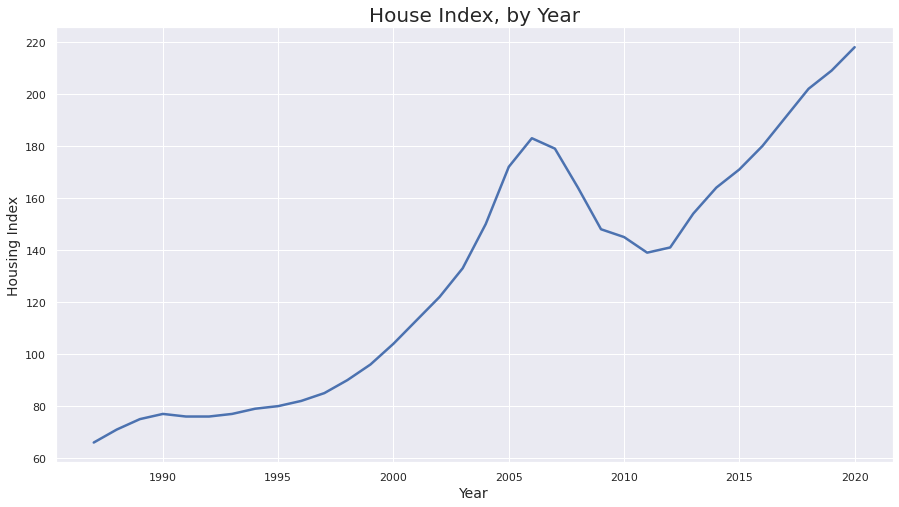

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="House_index",data=House_index,linewidth=2.5)
plt.xlabel("Year", size=14)
plt.ylabel("Housing Index", size=14)
plt.title("House Index, by Year", size=20)

In [ ]:
Permits=pd.read_csv("PERMIT.csv", parse_dates=True)
Permits.Date=pd.to_datetime(Permits.Date)
Permits['Year'] = Permits.Date.dt.year
Permits= Permits[['Year','PERMIT']]
Permits=Permits.groupby('Year').sum().astype('int64')
Permits.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,PERMIT
Year,
1960,12040
1961,12805
1962,14246
1963,15939
1964,15417


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Number of Permits given to build new houses, by Year')

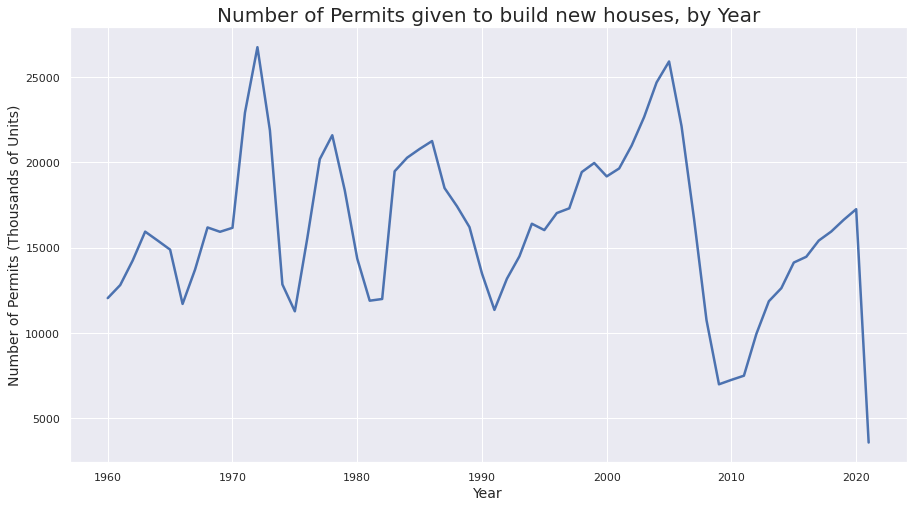

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="PERMIT",data=Permits,linewidth=2.5)
plt.xlabel("Year", size=14)
plt.ylabel("Number of Permits (Thousands of Units)", size=14)
plt.title("Number of Permits given to build new houses, by Year", size=20)

In [ ]:
Total_construction_spending=pd.read_csv("Total_construction_spending.csv", parse_dates=True)
Total_construction_spending.Date=pd.to_datetime(Total_construction_spending.Date)
Total_construction_spending['Year'] = Total_construction_spending.Date.dt.year
Total_construction_spending = Total_construction_spending[['Year','Total_construction_spending']]
Total_construction_spending = Total_construction_spending.groupby('Year').median().astype('int64')
Total_construction_spending.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Total_construction_spending
Year,
2002,403073
2003,445101
2004,541194
2005,628649
2006,612619


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Total construction spending, by Year')

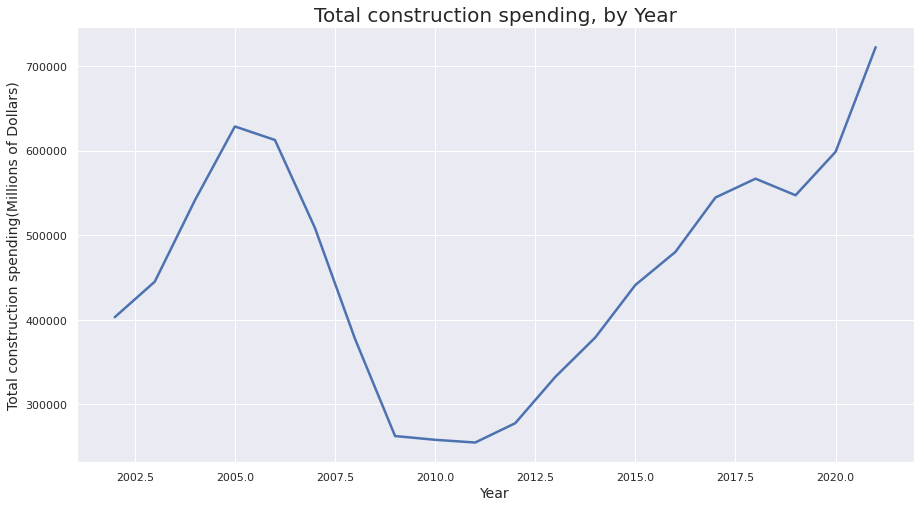

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="Total_construction_spending",data=Total_construction_spending,linewidth=2.5)
plt.xlabel("Year", size=14)
plt.ylabel("Total construction spending(Millions of Dollars)", size=14)
plt.title("Total construction spending, by Year", size=20)

In [ ]:
Median_number_days=pd.read_csv("Median_number_days.csv", parse_dates=True)
Median_number_days.Date=pd.to_datetime(Median_number_days.Date)
Median_number_days['Year'] = Median_number_days.Date.dt.year
Median_number_days = Median_number_days[['Year','Number_of_months']]
Median_number_days = Median_number_days.groupby('Year').median().astype('int64')
Median_number_days.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Number_of_months
Year,
1975,5
1976,4
1977,4
1978,3
1979,3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Number of months to sale, by Year')

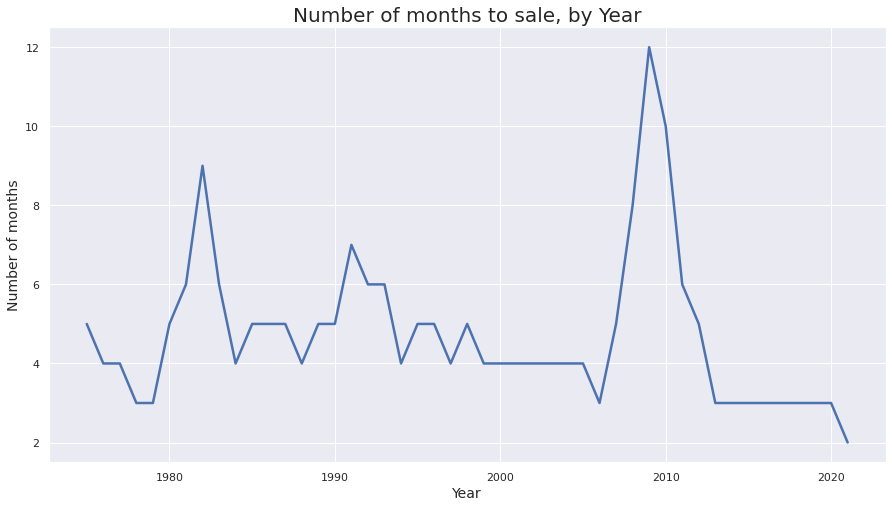

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="Number_of_months",data=Median_number_days,linewidth=2.5)
plt.xlabel("Year", size=14)
plt.ylabel("Number of months", size=14)
plt.title("Number of months to sale, by Year", size=20)


In [ ]:
Uemployment_rate=pd.read_csv("Uemployment_rate.csv", parse_dates=True)
Uemployment_rate.Date=pd.to_datetime(Uemployment_rate.Date)
Uemployment_rate['Year'] = Uemployment_rate.Date.dt.year
Uemployment_rate = Uemployment_rate[['Year','Unemployment_rate']]
Uemployment_rate = Uemployment_rate.groupby('Year').median().astype('int64')
Uemployment_rate.tail()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unemployment_rate
Year,
2017,4
2018,3
2019,3
2020,7
2021,6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Unemployment rate, by Year')

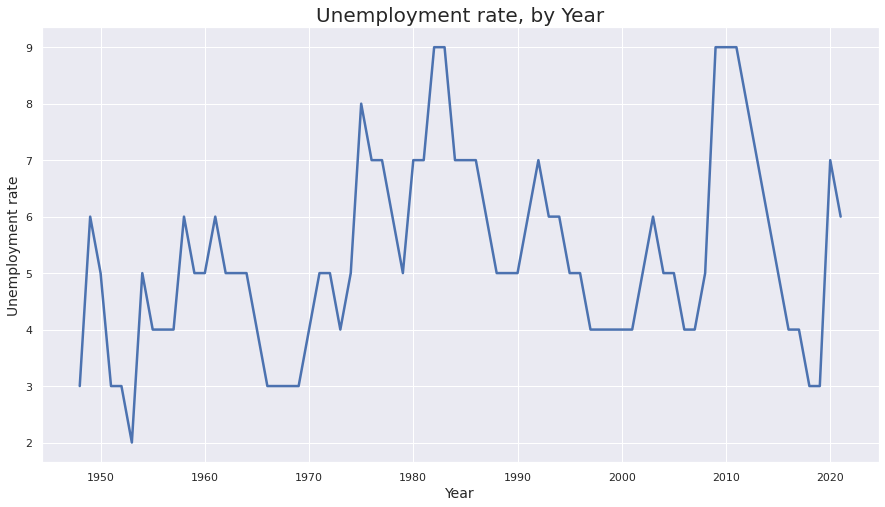

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="Unemployment_rate",data=Uemployment_rate,linewidth=2.5)
plt.xlabel("Year", size=14)
plt.ylabel("Unemployment rate", size=14)
plt.title("Unemployment rate, by Year", size=20)

In [ ]:
GDP=pd.read_csv("GDP.csv", parse_dates=True)
GDP.Date=pd.to_datetime(GDP.Date)
GDP['Year'] = GDP.Date.dt.year
GDP = GDP[['Year','GDP']]
GDP = GDP.groupby('Year').median().astype('int64')
GDP.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,GDP
Year,
1947,247
1948,275
1949,272
1950,299
1951,347


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'GDP, by Year')

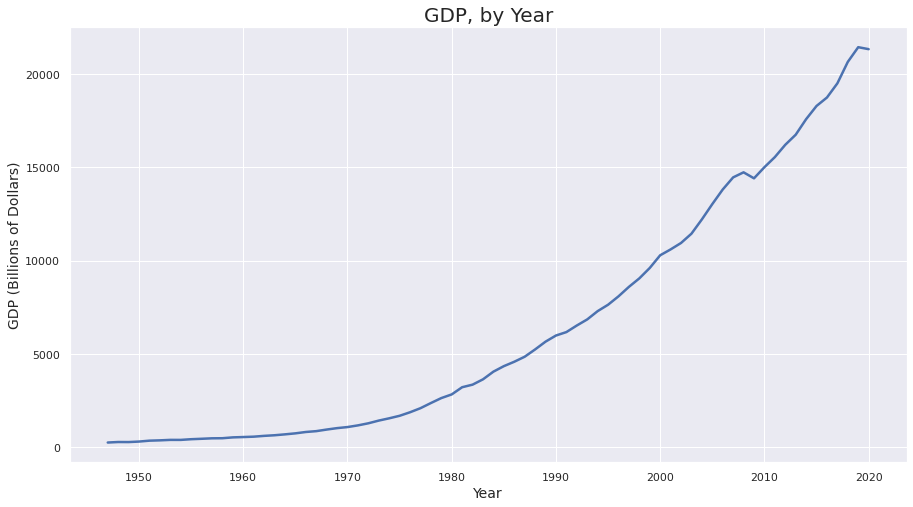

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="GDP",data=GDP,linewidth=2.5)
plt.xlabel("Year", size=14)
plt.ylabel("GDP (Billions of Dollars)", size=14)
plt.title("GDP, by Year", size=20)

In [ ]:
MORTGAGE=pd.read_csv("MORTGAGE.csv", parse_dates=True)
MORTGAGE.Date=pd.to_datetime(MORTGAGE.Date)
MORTGAGE['Year'] = MORTGAGE.Date.dt.year
MORTGAGE = MORTGAGE[['Year','Mortgage_rate']]
MORTGAGE = MORTGAGE.groupby('Year').median().astype('int64')
MORTGAGE.tail()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Mortgage_rate
Year,
2017,3
2018,4
2019,3
2020,3
2021,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Mortgage rate, by Year')

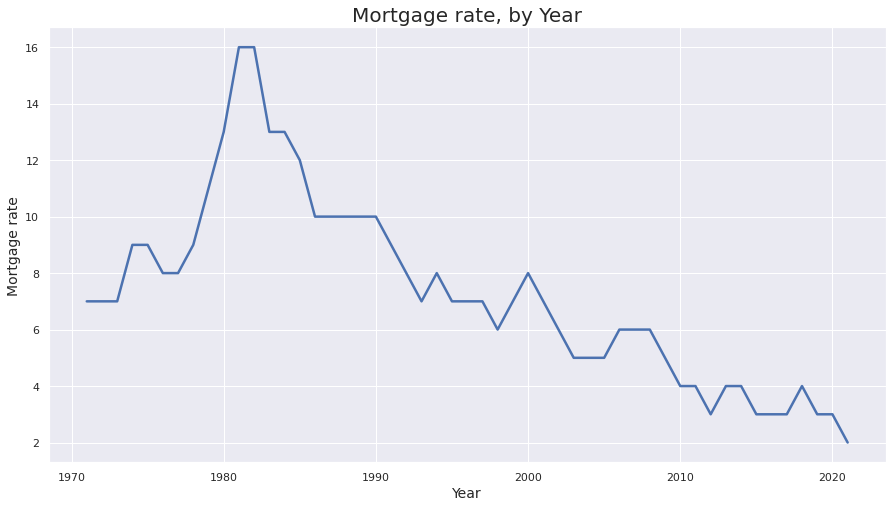

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="Mortgage_rate",data=MORTGAGE,linewidth=2.5)
plt.xlabel("Year", size=14)
plt.ylabel("Mortgage rate", size=14)
plt.title("Mortgage rate, by Year", size=20)

In [ ]:
Demographic=pd.read_csv("Demographic.csv", parse_dates=True)
Demographic.Date=pd.to_datetime(Demographic.Date)
Demographic['Year'] = Demographic.Date.dt.year
Demographic = Demographic[['Year','Number_of_people']]
Demographic = Demographic.groupby("Year").mean().astype('int64')
Demographic.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Number_of_people
Year,
1977,136376886
1978,138700628
1979,141044826
1980,143461040
1981,145229246


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Number of people between age 15-64, by Year')

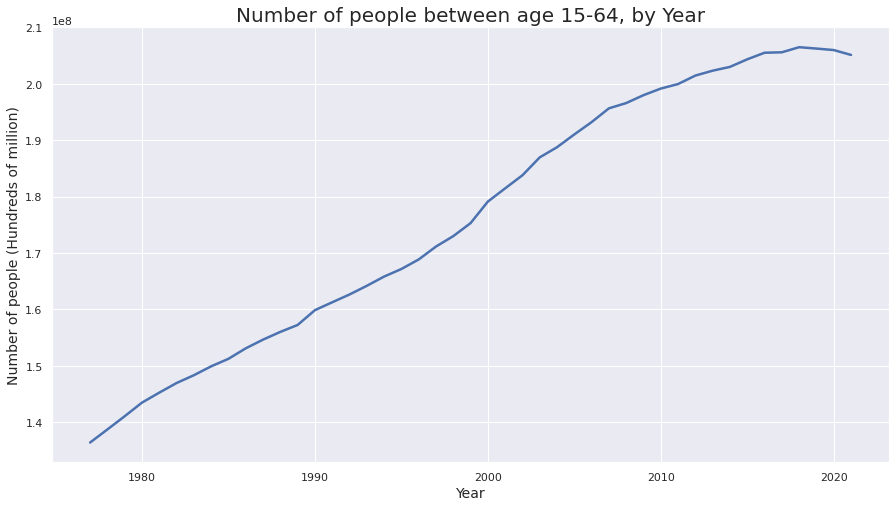

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="Number_of_people",data=Demographic,linewidth=2.5)
plt.xlabel("Year", size=14)
plt.ylabel("Number of people (Hundreds of million)", size=14)
plt.title("Number of people between age 15-64, by Year", size=20)

# **Merging Data**

In [ ]:
df = House_index.merge(Permits, on="Year")
df.head()

,House_index,PERMIT
Year,,
1987,66,18496
1988,71,17425
1989,75,16204
1990,77,13484
1991,76,11348


In [ ]:
df = df.merge(Total_construction_spending, on="Year")
df.head()

,House_index,PERMIT,Total_construction_spending
Year,,,
2002,122,20988,403073
2003,133,22661,445101
2004,150,24691,541194
2005,172,25921,628649
2006,183,22124,612619


In [ ]:
df = df.merge(Median_number_days, on="Year")
df.head()

,House_index,PERMIT,Total_construction_spending,Number_of_months
Year,,,,
2002,122,20988,403073,4
2003,133,22661,445101,4
2004,150,24691,541194,4
2005,172,25921,628649,4
2006,183,22124,612619,3


In [ ]:
df = df.merge(Uemployment_rate, on="Year")
df.head()

,House_index,PERMIT,Total_construction_spending,Number_of_months,Unemployment_rate
Year,,,,,
2002,122,20988,403073,4,5
2003,133,22661,445101,4,6
2004,150,24691,541194,4,5
2005,172,25921,628649,4,5
2006,183,22124,612619,3,4


In [ ]:
df = df.merge(GDP, on="Year")
df.head()

,House_index,PERMIT,Total_construction_spending,Number_of_months,Unemployment_rate,GDP
Year,,,,,,
2002,122,20988,403073,4,5,10942
2003,133,22661,445101,4,6,11440
2004,150,24691,541194,4,5,12206
2005,172,25921,628649,4,5,13026
2006,183,22124,612619,3,4,13808


In [ ]:
df = df.merge(MORTGAGE, on="Year")
df.head()

,House_index,PERMIT,Total_construction_spending,Number_of_months,Unemployment_rate,GDP,Mortgage_rate
Year,,,,,,,
2002,122,20988,403073,4,5,10942,6
2003,133,22661,445101,4,6,11440,5
2004,150,24691,541194,4,5,12206,5
2005,172,25921,628649,4,5,13026,5
2006,183,22124,612619,3,4,13808,6


In [ ]:
df = df.merge(Demographic, on="Year")



# **Final Dataset**

In [ ]:
df.head()

,House_index,PERMIT,Total_construction_spending,Number_of_months,Unemployment_rate,GDP,Mortgage_rate,Number_of_people
Year,,,,,,,,
2002,122,20988,403073,4,5,10942,6,183788032
2003,133,22661,445101,4,6,11440,5,186962792
2004,150,24691,541194,4,5,12206,5,188764263
2005,172,25921,628649,4,5,13026,5,191032492
2006,183,22124,612619,3,4,13808,6,193220221


# Checking null value

In [ ]:
df.isna().sum()

House_index                    0
PERMIT                         0
Total_construction_spending    0
Number_of_months               0
Unemployment_rate              0
GDP                            0
Mortgage_rate                  0
Number_of_people               0
dtype: int64

# Checking outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

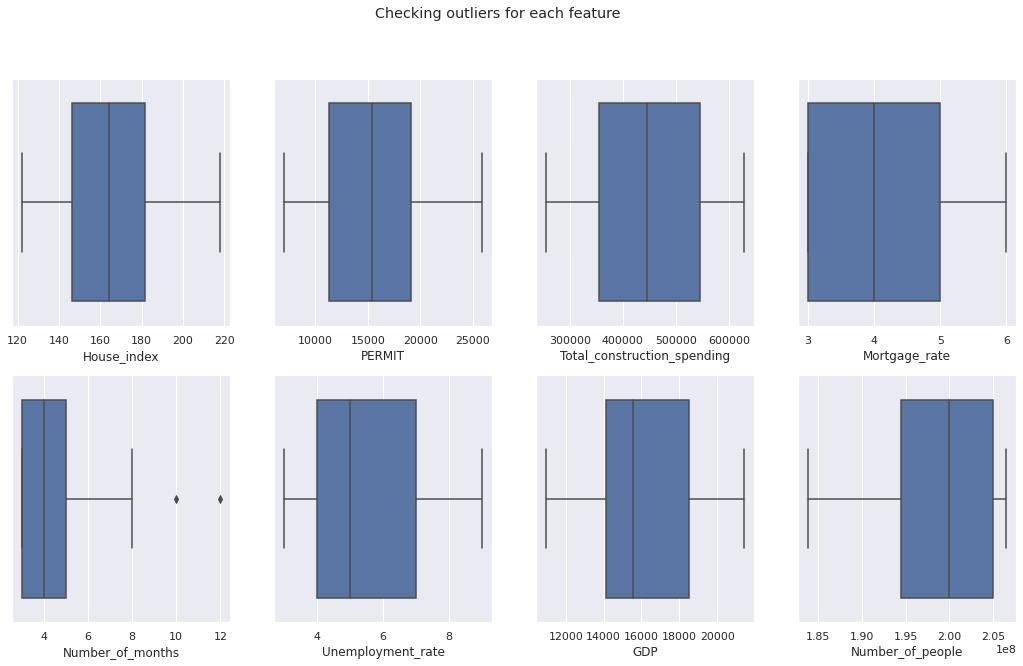

In [ ]:
fig, axes = plt.subplots(2,4 , figsize=(18, 10))

fig.suptitle('Checking outliers for each feature')

sns.boxplot(ax=axes[0, 0], data=df, x="House_index")
sns.boxplot(ax=axes[0, 1], data=df, x='PERMIT')
sns.boxplot(ax=axes[0, 2], data=df, x='Total_construction_spending')
sns.boxplot(ax=axes[0, 3], data=df, x='Mortgage_rate')
sns.boxplot(ax=axes[1, 0], data=df, x='Number_of_months')
sns.boxplot(ax=axes[1, 1], data=df, x='Unemployment_rate')
sns.boxplot(ax=axes[1, 2], data=df, x='GDP')
sns.boxplot(ax=axes[1, 3], data=df, x='Number_of_people')

The technique I choose have handled the outliers for almost all the features majorly. 

Co-relation is a very useful function. As, it gives a very clear quantative answer about features contribute to the target label and how by much

Negative coorelation shows if one variable increases then other decreases.
Positive Cooreation shows if one variable increases then other increases too.

No. of people between the age of 15-64 has positive coorelation, it means if no. of people increases, housing index increases, that is what we expect coz if no. of people increases then demand inc., resulting in increase in housing price. Similar results can be found with GDP.

Mortage rate has -ve coorelation, it means if mortgage rate increases then housing index decreases, that is what we expect coz if MR inc. then demand dec.,resulting in decrease in housing price. Similar results can be found with unempolyment and time took sell a house in months.

In case of permits, it was expected that the coorelation between housing index and permit should be -ve coz if permit inc., then supply inc., resulting in inc. in housing index but it turned out other way round. The conclusion, i made from +ve coorelation is that, though the permits are increasing, but they are not able to match the level of demand. which indicates, demand is still higher than supply, resulting in inc. in housing index.

Total construction spending indicates total amount spent on residential construction. It has +ve coorelation, if TCS inc. then HI inc., I made two conclusions out of it, though i invalided one with my reasoning. 
1. The inc. in TCS is due to the inc. in the price of material used. if this is the case, if cost of the material is increasing then this will result in inc. in HI. 
2. If TCS inc., means new houses are built, which results in inc. in supply. If supply inc., HI dec.. So, we expect the coorelation to be -ve but it is +ve actually. so that is why i invalided the conclusion.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

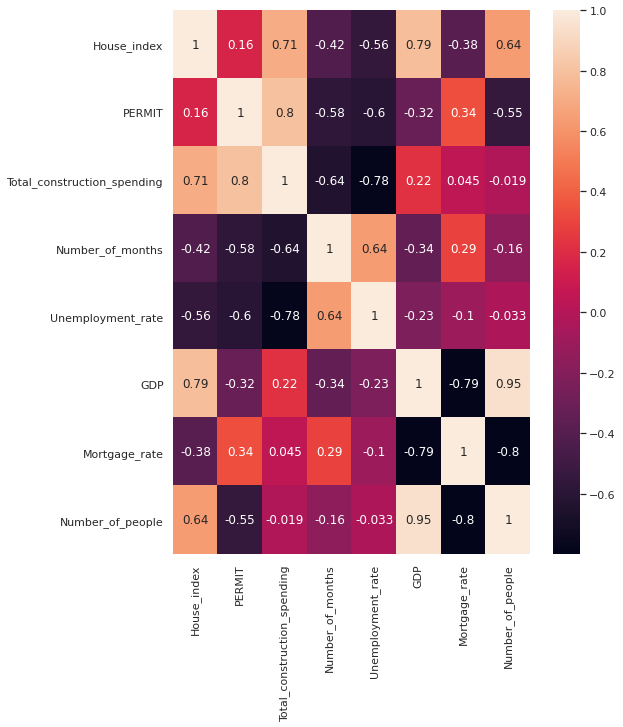

In [ ]:
plt.figure(figsize=(8, 10))
sns.heatmap(df.corr(), annot=True)

# Training Model

In [ ]:
X, y = df.loc[:, df.columns != 'House_index'], df.loc[:, 'House_index'] 

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                      test_size = 0.3, random_state = 123) 

xgb_r = xg.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3,
learning_rate = 0.1, max_depth = 5, alpha = 10, random_state=777,
n_estimators = 100) 

<IPython.core.display.Javascript object>

In [ ]:
xgb_r.fit(train_X, train_y)

[19:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=777,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
pred = xgb_r.predict(test_X) 

In [ ]:
rmsle = np.sqrt(mean_squared_log_error(pred,test_y))
rmsle

<IPython.core.display.Javascript object>

0.06562712900005235

<IPython.core.display.Javascript object>

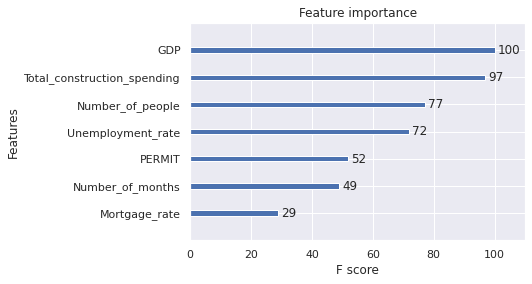

In [ ]:
plot_importance(xgb_r)
plt.show()

# **Time for some parameter tuning.**

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
n_estimators=500, learning_rate=0.2, gamma=0,  alpha = 9,subsample=0.85,
colsample_bytree=1, max_depth=10) 

In [ ]:
xgb_r.fit(train_X, train_y)

[19:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=9, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.85, verbosity=1)

In [ ]:
pred = xgb_r.predict(test_X) 
rmsle = np.sqrt(mean_squared_log_error(pred,test_y))
rmsle

<IPython.core.display.Javascript object>

0.06379341392419968

<IPython.core.display.Javascript object>

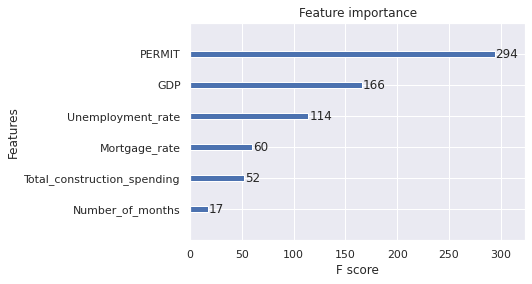

In [ ]:
plot_importance(xgb_r)
plt.show()

In [ ]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(train_X,train_y)
    test_pred=clf.predict(test_X)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,test_y)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.07745481487873099,
  0.06979758583619759,
  0.07267477450011454,
  0.20391796893924033,
  0.13212211227407342]}

# **Time for some parameter tuning. Going with AdaboostRegressor as it performed best.**

In [ ]:
no_of_test=[500]
params_dict={'n_estimators':no_of_test, 'learning_rate' : [0.0001, 0.001, 0.01, 0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']}
clf_rf=GridSearchCV(estimator=AdaBoostRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(train_X,train_y)
predi=clf_rf.predict(test_X)
print((np.sqrt(mean_squared_log_error(predi,test_y))))


<IPython.core.display.Javascript object>

0.0689053322037766


This shows the parameters using which the algo. performed best.

In [ ]:
clf_rf.best_params_

{'learning_rate': 1, 'loss': 'linear', 'n_estimators': 500}

In [ ]:
predictions = xgb_r.predict(test_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions,test_y)))
predictions

Mean Absolute Error: 11.018518518518519


array([191.        , 168.88888889, 172.        , 209.        ,
       145.        , 156.        ])